# 라이브러리 정의

In [1]:
# 데이터 처리 라이브러리
import pandas as pd
import numpy as np

# 분석 알고리즘 DecisionTree 구현 라이브러리
from sklearn.tree import DecisionTreeRegressor

# 과거데이터를 8:2, 7:3 이나 이런식으로 자동으로 나누어주는 함수 
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# 데이터 불러오기

In [2]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155


# 1. 데이터 전처리

### 1-1. 타입 통합 / 특성 숫자컬럼 추가

### 1-1-1. 데이터 타입 통합

In [3]:
# 주의할 사항! 모든 컬럼에 대해서 고정시키는걸 고려하는게 나을 수도 있다.
featuresData.QTY = featuresData.QTY.astype(float) # QTY컬럼의 타입 변환 (int -> float)

In [4]:
featuresData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REGIONID      105 non-null    object 
 1   PRODUCTGROUP  105 non-null    object 
 2   PRODUCT       105 non-null    object 
 3   ITEM          105 non-null    object 
 4   YEARWEEK      105 non-null    int64  
 5   YEAR          105 non-null    int64  
 6   WEEK          105 non-null    int64  
 7   QTY           105 non-null    float64
 8   HOLIDAY       105 non-null    object 
 9   HCLUS         105 non-null    int64  
 10  PROMOTION     105 non-null    object 
 11  PRO_PERCENT   105 non-null    float64
dtypes: float64(2), int64(4), object(6)
memory usage: 10.0+ KB


### 1-1-2. 특성 값 숫자컬럼 변경

이유: 머신러닝 특성은 숫자형 지원  /  해결: Y -> 1, N -> 0 과같이 변환

In [5]:
featuresData.columns

Index(['REGIONID', 'PRODUCTGROUP', 'PRODUCT', 'ITEM', 'YEARWEEK', 'YEAR',
       'WEEK', 'QTY', 'HOLIDAY', 'HCLUS', 'PROMOTION', 'PRO_PERCENT'],
      dtype='object')

In [6]:
#HOLIDAY컬럼에 Y N 를 1 0 으로 변경
featuresData["HOLIDAY_NEW"] = np.where(featuresData.HOLIDAY=="Y",1,0)

In [7]:
#PROMOTION 컬럼에 Y N 를 1 0 으로 변경
featuresData["PROMOTION_NEW"] = np.where(featuresData.PROMOTION=="Y",1,0)

## 1-2. 특성선정 / 데이터분리

### 1-2-1. 특성선정

In [8]:
# 데이터프레임명.corr() = 상관관계확인
corrDf = featuresData.corr()

In [9]:
corrDf

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,HOLIDAY_NEW,PROMOTION_NEW
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.049867,0.205916
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,-0.031106,0.195931
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.273710,0.060206
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.505932,0.612451
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.974601,-0.374072
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.487062,0.898554
HOLIDAY_NEW,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,1.000000,0.365148
PROMOTION_NEW,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,0.365148,1.000000


In [10]:
standardLimit = 0.5

In [11]:
features = list(corrDf.loc[(abs(corrDf.QTY) > standardLimit) & (corrDf.QTY != 1)].index)

In [12]:
label = ["QTY"]

### 1-2-2. 데이터 분리

In [13]:
# 데이터프레임명.shape = 행과 열의 갯수 확인
featuresData.shape # 105개의 행, 14개의 컬럽

(105, 14)

In [14]:
sortKey = ["REGIONID", "ITEM", "YEARWEEK"]

In [15]:
sortedData = featuresData.sort_values(sortKey, ignore_index=True)
standardIndex = 0.8

In [16]:
# 정렬하고 80%에 있는 인덱스의 번호로 분리시킨다
selectedIndex = int( list (sortedData.shape) [0] * standardIndex )

In [17]:
yearweekStd = sortedData.loc[selectedIndex].YEARWEEK

In [18]:
# 훈련데이터와 테스트데이터를 (문제지와 정답지로 구분해서 정의한다)
trainingDataFeatures = sortedData.loc[sortedData.YEARWEEK <= yearweekStd, features]
trainingDataLabel = sortedData.loc[sortedData.YEARWEEK <= yearweekStd, label]
testDataFeatures = sortedData.loc[sortedData.YEARWEEK > yearweekStd, features]
testDataLabel = sortedData.loc[sortedData.YEARWEEK > yearweekStd, label]

# 2. 모델적용

## 2-1 모델적용

### 2-1-1 학습

In [19]:
model = DecisionTreeRegressor(random_state=10) # random_state = 

In [20]:
model.fit(X = trainingDataFeatures, y = trainingDataLabel)

DecisionTreeRegressor(random_state=10)

# 3. 예측

In [21]:
predictValue = model.predict(testDataFeatures)

In [22]:
predictValue

array([ 350.71428571, 1434.6       , 1434.6       , 1434.6       ,
       1434.6       , 1434.6       , 1708.75      , 1708.75      ,
       2620.42857143, 1708.75      ,  350.71428571, 2193.8       ,
       2193.8       , 2193.8       , 2193.8       , 2193.8       ,
       1434.6       , 1434.6       , 1434.6       , 1434.6       ])

In [23]:
predictDf = pd.DataFrame(list(predictValue), columns=["PREDICT"])

# 4. 데이터 정리

In [24]:
validataDf = pd.concat([testDataLabel.reset_index(drop=True), predictDf], axis=1)

# 5. 정확도 검증

In [25]:
mean_absolute_error(y_true=validataDf.QTY,
                          y_pred=validataDf.PREDICT)

398.78035714285716

In [26]:
rmse = np.sqrt(mean_squared_error(y_true=validataDf.QTY,
                   y_pred=validataDf.PREDICT))

In [55]:
# [장점]
# DecisionTree ->과거의 경험치를 그대로 반영한다
#                  변동성이 큰 데이터에서 강하다
# [단점]
# 오버피팅 (너무과거에 ...?)\
# randomforest -> 단점을 보완하기 위해 나온...?
#                 [장점] DecisionTree 오버피팅을 해결
#                 [단점] 설명력이 좀 어렵다

## Graphviz 불러오기

In [29]:
import os 

In [30]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

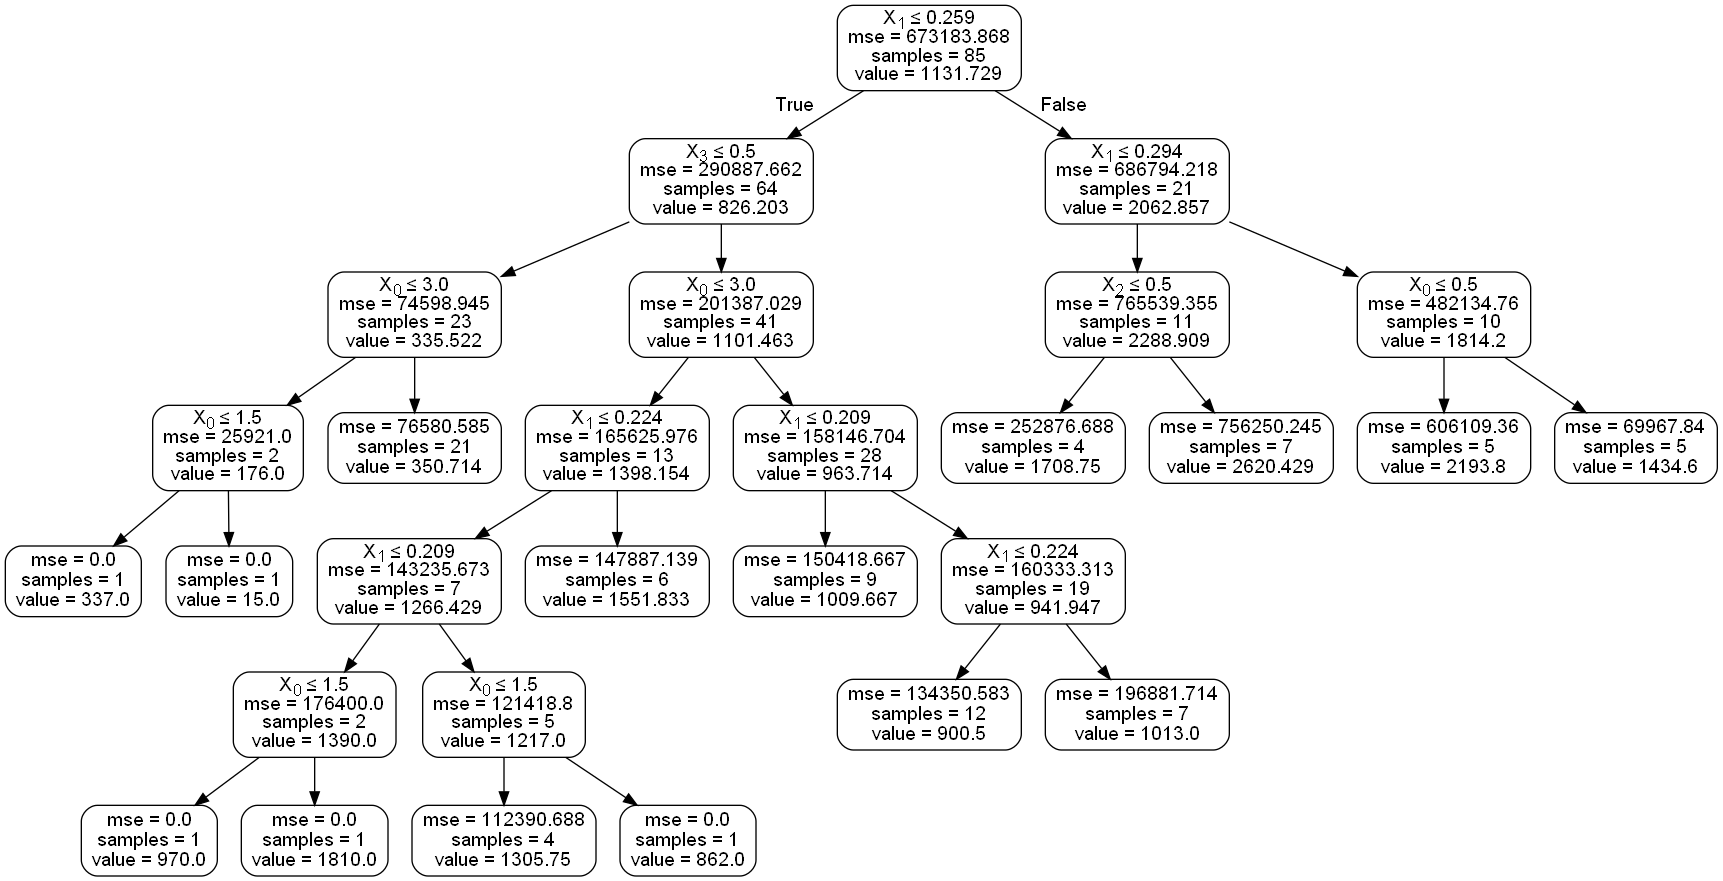

In [31]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [59]:
# 데이터 처리 라이브러리
import pandas as pd 
import numpy as np 

# 분석알고리즘 DecisionTree 구현 라이브러리 
from sklearn.tree import DecisionTreeRegressor 

 # 과거데이터를 8:2, 7:3 이나 이런식으로 자동으로 나누어주는 라이브러리 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestRegressor

import sys 
import pickle 

loadedModel= "finalized_model.sav"

loaded_model2 = pickle.load(open(loadedModel, 'rb')) 
loaded_model2 

userInputHCLUS = 1 
userInputProPercent=0.5 
userInputHoilidayYn = 1 
userInputPromotionYn = 1 

futureData = pd.DataFrame( [[ userInputHCLUS,
                              userInputProPercent,               
                              userInputHoilidayYn,               
                              userInputPromotionYn]] ) 

# pickle 파일로 저장가능하다. 
print(loaded_model2.predict(futureData))

FileNotFoundError: [Errno 2] No such file or directory: 'finalized_model.sav'